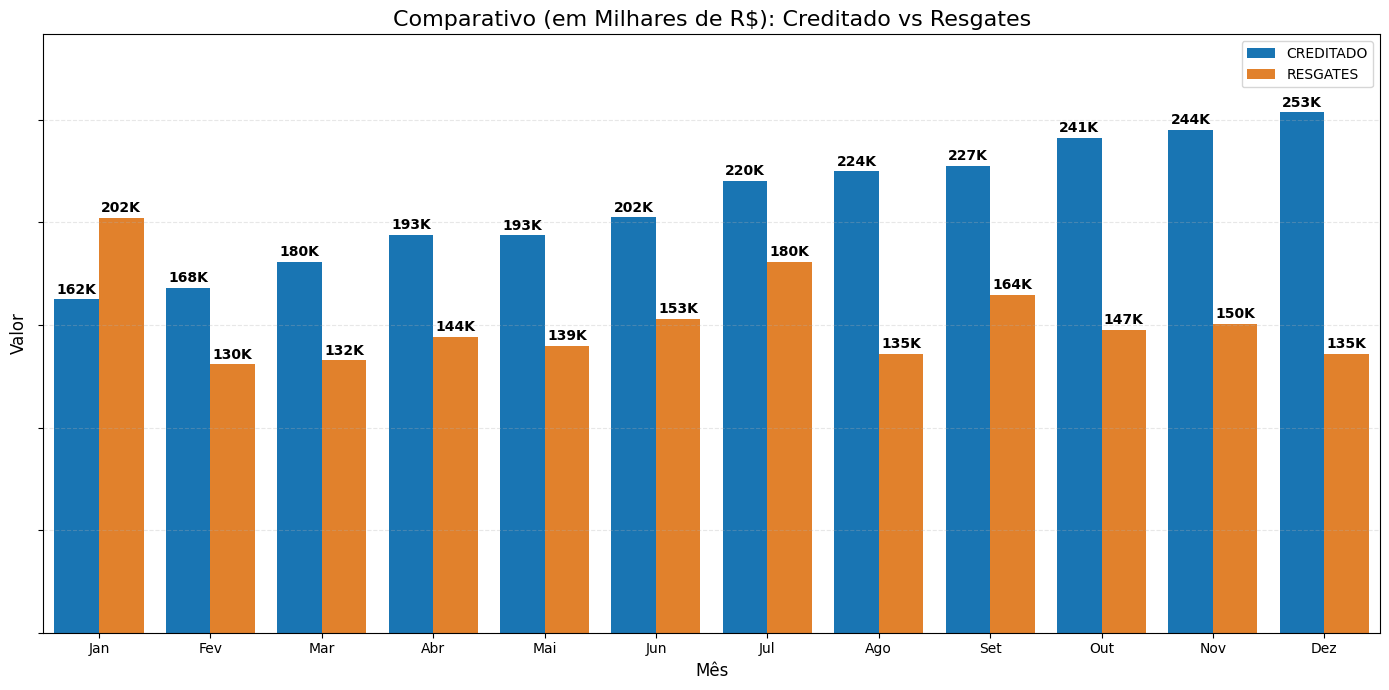

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import numpy as np

# ==============================================================================
# 1. GERAÇÃO DOS DADOS (Para garantir que o arquivo exista no ambiente)
# ==============================================================================
# Se você já tiver o arquivo carregado, pode pular esta parte.
np.random.seed(42)
meses = ['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez']
n = 12
faturado_base = np.linspace(200000, 320000, n)
creditado = faturado_base * 0.8 + np.random.normal(0, 5000, n)
resgates = np.random.normal(150000, 10000, n)
resgates[0] += 50000 # Pico em Jan
resgates[6] += 40000 # Pico em Jul

# Cria o arquivo Excel simulando a sua base
df_temp = pd.DataFrame({'MÊS': meses, 'CREDITADO': creditado.astype(int), 'RESGATES': resgates.astype(int)})
df_temp.to_excel('base44.xlsx', index=False)


# ==============================================================================
# 2. SEU CÓDIGO ADAPTADO
# ==============================================================================

# 1. Carregar os dados
# Substituí o xl("A1:I13") pelo pd.read_excel padrão
df = pd.read_excel("base44.xlsx")

# 2. Limpeza
cols_analise = ['CREDITADO', 'RESGATES']
for col in cols_analise:
    # Verificação de segurança: Só aplica limpeza de string se a coluna for texto
    if df[col].dtype == object:
        s = df[col].astype(str)
        s = s.str.replace('R$', '', regex=False).str.replace('.', '', regex=False)
        s = s.str.replace(',', '.', regex=False).str.replace('-', '0', regex=False)
        df[col] = pd.to_numeric(s, errors='coerce').fillna(0)

df_melted = df.melt(id_vars='MÊS', value_vars=['CREDITADO', 'RESGATES'], var_name='Tipo', value_name='Valor')

# 3. Criar o Gráfico (Seaborn)
plt.figure(figsize=(14, 7))

ax = sns.barplot(data=df_melted, x='MÊS', y='Valor', hue='Tipo', palette=['#007acc', '#ff7f0e'])

# 4. Rótulos Otimizados
for container in ax.containers:
    # Apenas o número e o K (Ex: 666K)
    labels = [f"{math.floor(v/1000)}K" if v > 0 else "" for v in container.datavalues]

    # fontsize=10 para melhor leitura
    ax.bar_label(container, labels=labels, padding=2, fontsize=10, fontweight='bold')

# Formatação visual
plt.title('Comparativo (em Milhares de R$): Creditado vs Resgates', fontsize=16)
plt.ylabel('Valor', fontsize=12)
plt.xlabel('Mês', fontsize=12)
plt.legend(bbox_to_anchor=(1, 1)) # Legenda no canto

# Eixo Y limpo
ax.yaxis.set_major_formatter(plt.NullFormatter())
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.margins(y=0.15)
plt.tight_layout()
plt.show()

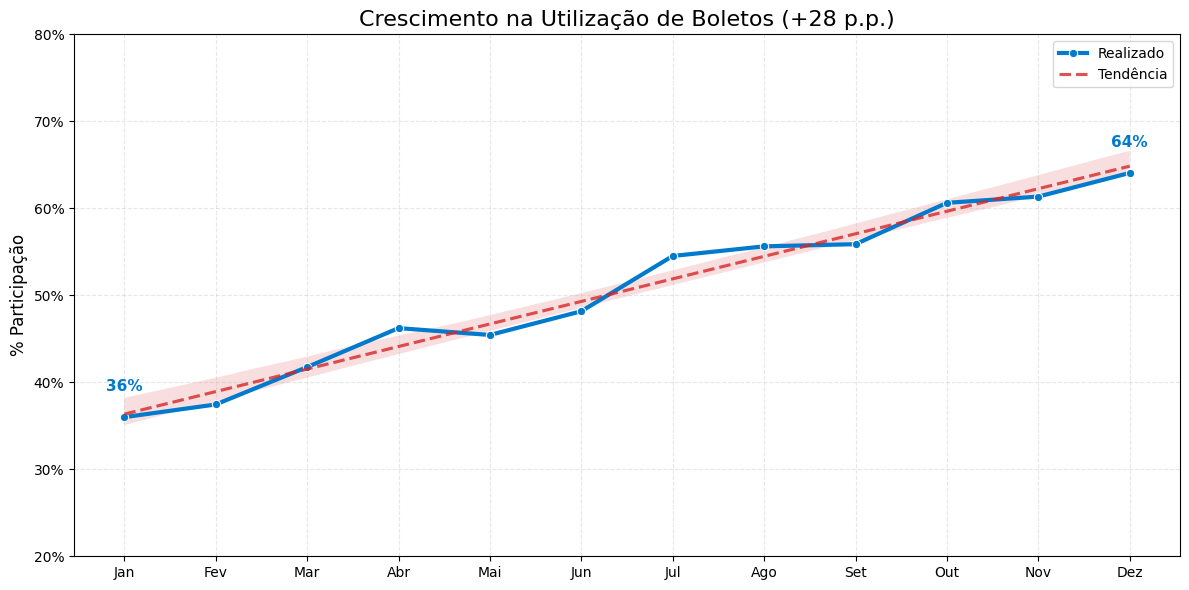

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick
import numpy as np

# ==============================================================================
# 1. GERAR DADOS FICTÍCIOS (Para o código funcionar sozinho)
# ==============================================================================
# Se você já tem a planilha, pode pular esta parte.
np.random.seed(42)
meses = ['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez']
n = 12

# Criando um crescimento simulado na preferência por boletos (de 35% a 65%)
perc_boletos = np.linspace(0.35, 0.65, n) + np.random.normal(0, 0.02, n)

df_temp = pd.DataFrame({'MÊS': meses, '% BOLETOS': perc_boletos})
df_temp.to_excel('base44.xlsx', index=False)


# 1. Carregar Dados
# Substituí o xl(...) pelo pd.read_excel
df = pd.read_excel("base44.xlsx")

# 2. Limpeza Inteligente da Coluna %
col_alvo = '% BOLETOS'

# Tenta converter para número (se vier como string "30%", vira NaN, se vier 0.3, fica 0.3)
df[col_alvo] = pd.to_numeric(df[col_alvo], errors='coerce').fillna(0)

# CORREÇÃO: Se os dados estiverem em decimal (0.35), multiplica por 100 virar (35.0)
if df[col_alvo].mean() < 1:
    df[col_alvo] = df[col_alvo] * 100

# 3. Filtrar (remove linhas zeradas)
df_filtrado = df[df[col_alvo] > 0].copy()

# Cria índice numérico (0, 1, 2...) necessário para o cálculo da regressão linear
df_filtrado['Indice_Mes'] = range(len(df_filtrado))

# 4. Criar o Gráfico
plt.figure(figsize=(12, 6))

# Linha Real (Azul)
sns.lineplot(data=df_filtrado, x='MÊS', y=col_alvo, marker='o',
             color='#007acc', linewidth=3, label='Realizado')

# Tendência (Vermelha Pontilhada)
sns.regplot(data=df_filtrado, x='Indice_Mes', y=col_alvo, scatter=False,
            color='#d62728', line_kws={'linestyle': '--', 'alpha': 0.8}, label='Tendência')

# 5. Cálculos para Título e Rótulos das pontas
y_inicio = df_filtrado[col_alvo].iloc[0]
y_fim = df_filtrado[col_alvo].iloc[-1]
crescimento = y_fim - y_inicio

# Adiciona texto no início e no fim da linha
plt.text(0, y_inicio + 3, f'{y_inicio:.0f}%', ha='center', color='#007acc', fontweight='bold', fontsize=11)
plt.text(len(df_filtrado)-1, y_fim + 3, f'{y_fim:.0f}%', ha='center', color='#007acc', fontweight='bold', fontsize=11)

# 6. Formatação Final
plt.title(f'Crescimento na Utilização de Boletos (+{crescimento:.0f} p.p.)', fontsize=16)
plt.ylabel('% Participação', fontsize=12)
plt.xlabel('')
plt.xticks(rotation=0) # Meses curtos não precisam de rotação
plt.ylim(20, 80)       # Margem de segurança para o gráfico respirar
plt.grid(True, linestyle='--', alpha=0.3)
plt.legend()

# Formata o eixo Y com o símbolo de %
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(decimals=0))

plt.tight_layout()
plt.show()

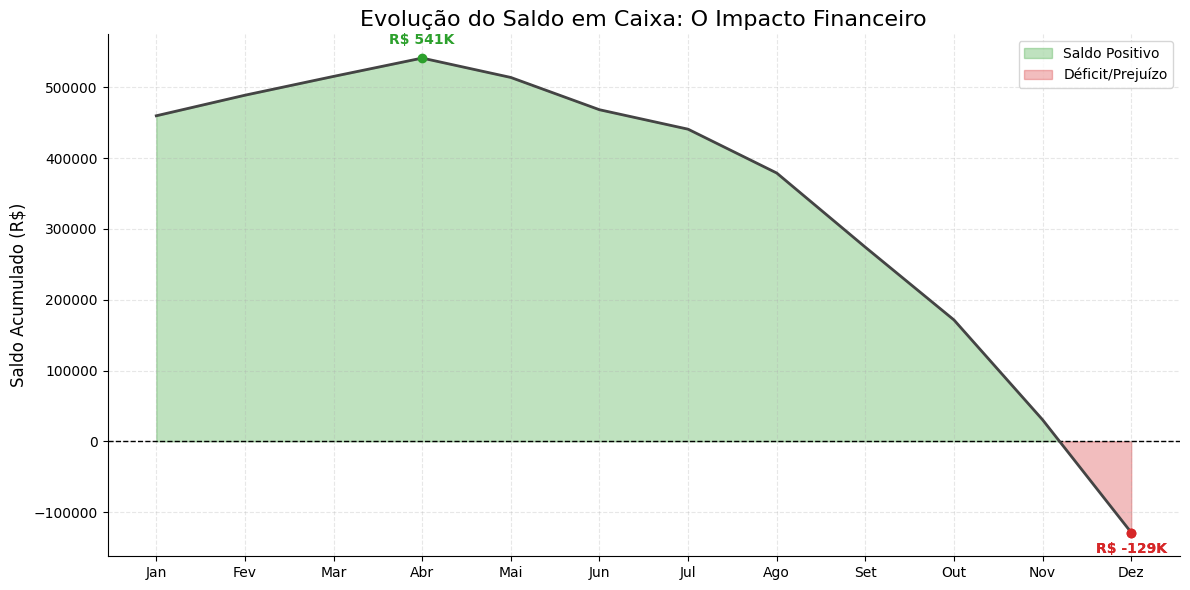

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.ticker as mtick

# --- 1. GERANDO DADOS FICTÍCIOS (Garante que o arquivo existe) ---
np.random.seed(42)
meses = ['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez']
n = 12

# Simulando a queda do caixa
saldo_inicial = 400000
fluxo = np.linspace(50000, -150000, n) + np.random.normal(0, 20000, n)
saldo_acumulado = np.cumsum(fluxo) + saldo_inicial

# Criando o arquivo
df_temp = pd.DataFrame({'MÊS': meses, 'SALDO CAIXA': saldo_acumulado.astype(int)})
df_temp.to_excel('base44.xlsx', index=False)


# --- 2. CÓDIGO DO GRÁFICO ---

# 1. Carregar
df = pd.read_excel("base44.xlsx")

# 2. Configurar o Gráfico
plt.figure(figsize=(12, 6))

x = range(len(df['MÊS']))
y = df['SALDO CAIXA']

# 3. Plotar a Linha Principal
plt.plot(x, y, color='#444444', linewidth=2, zorder=10)

# 4. Preenchimento Condicional (Verde acima de 0, Vermelho abaixo)
plt.fill_between(x, y, 0, where=(y >= 0), color='#2ca02c', alpha=0.3, interpolate=True, label='Saldo Positivo')
plt.fill_between(x, y, 0, where=(y <= 0), color='#d62728', alpha=0.3, interpolate=True, label='Déficit/Prejuízo')

# 5. Adicionar Linha de Zero
plt.axhline(0, color='black', linewidth=1, linestyle='--')

# 6. Rótulos Inteligentes (Apenas Max, Min e Último)
ponto_max = y.idxmax()
ponto_min = y.idxmin()
ultimo = len(y) - 1

pontos_chave = [ponto_max, ponto_min, ultimo]

for i in pontos_chave:
    valor = y[i]
    cor = '#2ca02c' if valor >= 0 else '#d62728'
    # Formata para K (ex: 150K)
    texto = f"R$ {valor/1000:.0f}K"

    plt.scatter(i, valor, color=cor, zorder=11)
    plt.annotate(texto, (i, valor), xytext=(0, 10 if valor>0 else -15),
                 textcoords='offset points', ha='center', color=cor, fontweight='bold')

# 7. Formatação Final
plt.title('Evolução do Saldo em Caixa: O Impacto Financeiro', fontsize=16)
plt.xticks(x, df['MÊS'])
plt.ylabel('Saldo Acumulado (R$)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.3)
plt.legend(loc='upper right')

# Remove bordas desnecessárias
sns.despine()

plt.tight_layout()
plt.show()

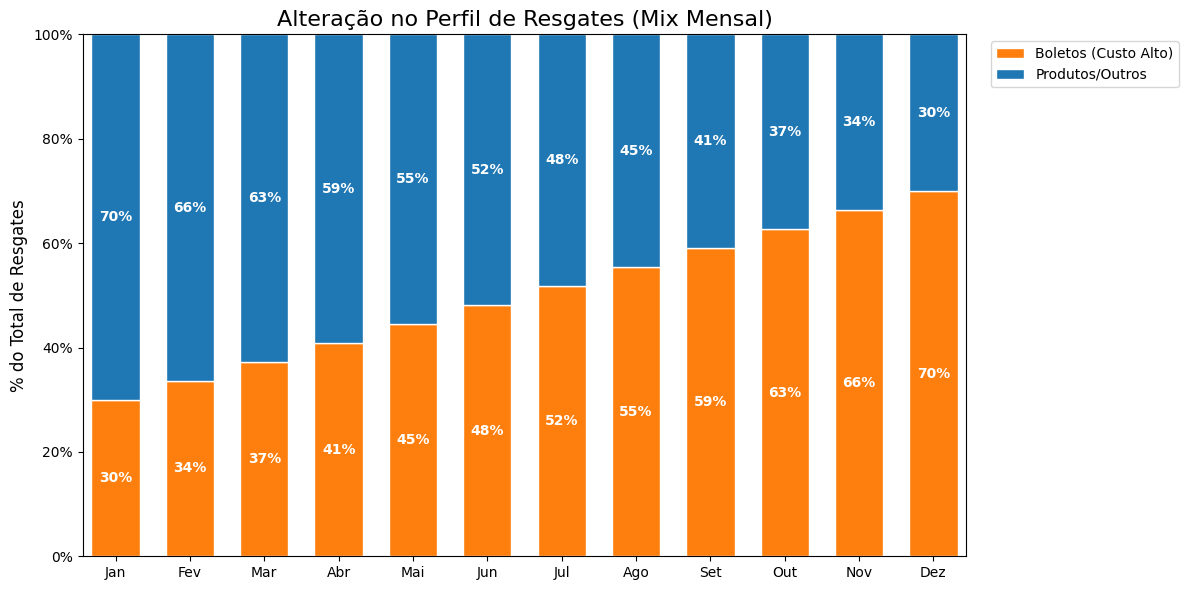

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import numpy as np

# --- 1. GERANDO DADOS FICTÍCIOS (Para garantir que tem as colunas certas) ---
np.random.seed(42)
meses = ['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez']
n = 12

# Total de resgates (com sazonalidade)
resgates_total = np.linspace(150000, 180000, n) + np.random.normal(0, 5000, n)
resgates_total[0] += 40000 # Jan
resgates_total[6] += 30000 # Jul

# Boletos crescendo de 30% para 70% do total
perc_boletos = np.linspace(0.30, 0.70, n)
valor_boletos = resgates_total * perc_boletos
valor_outros = resgates_total - valor_boletos

df_temp = pd.DataFrame({
    'MÊS': meses,
    'BOLETOS': valor_boletos.astype(int),
    'OUTROS_PREMIOS': valor_outros.astype(int)
})
df_temp.to_excel('base44.xlsx', index=False)


# --- 2. CÓDIGO DO GRÁFICO (Mix de Resgates) ---

# 1. Carregar
df = pd.read_excel("base44.xlsx")

# 2. Preparar os dados para 100% (Normalização)
# Criamos uma coluna de Total para calcular as porcentagens
df['Total'] = df['BOLETOS'] + df['OUTROS_PREMIOS']
df['Pct_Boletos'] = df['BOLETOS'] / df['Total'] * 100
df['Pct_Outros'] = df['OUTROS_PREMIOS'] / df['Total'] * 100

# 3. Plotar
plt.figure(figsize=(12, 6))
bar_width = 0.65

# Barra de Baixo (Boletos)
p1 = plt.bar(df['MÊS'], df['Pct_Boletos'], color='#ff7f0e', edgecolor='white', width=bar_width, label='Boletos (Custo Alto)')
# Barra de Cima (Outros)
p2 = plt.bar(df['MÊS'], df['Pct_Outros'], bottom=df['Pct_Boletos'], color='#1f77b4', edgecolor='white', width=bar_width, label='Produtos/Outros')

# 4. Adicionar Rótulos dentro das barras
for i in range(len(df)):
    # Rótulo Boletos
    plt.text(i, df['Pct_Boletos'][i]/2, f"{df['Pct_Boletos'][i]:.0f}%",
             ha='center', va='center', color='white', fontweight='bold', fontsize=10)

    # Rótulo Outros (só mostra se for relevante para não poluir)
    if df['Pct_Outros'][i] > 10:
        plt.text(i, df['Pct_Boletos'][i] + df['Pct_Outros'][i]/2, f"{df['Pct_Outros'][i]:.0f}%",
                 ha='center', va='center', color='white', fontweight='bold', fontsize=10)

# 5. Formatação
plt.title('Alteração no Perfil de Resgates (Mix Mensal)', fontsize=16)
plt.ylabel('% do Total de Resgates', fontsize=12)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left')
plt.margins(x=0.01)

# Eixo Y de 0 a 100%
plt.ylim(0, 100)
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())

plt.tight_layout()
plt.show()